<a href="https://colab.research.google.com/github/MillenRodrigues/VizualizacaoDeDados/blob/main/Trilha6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


Millen Tavares Rodrigues

Tia: 92300073

Disponível em [github](https://github.com/MillenRodrigues/VizualizacaoDeDados/blob/main/Trilha6.ipynb)

# Sobre o conjunto de dados

No final de dezembro de 2019, as pessoas em Wuhan, na China, começaram a adoecer com uma pneumonia até então desconhecida, marcando o início de uma nova doença infecciosa, mais tarde identificada como um novo tipo de coronavírus e denominada SARS-CoV-2. A doença causada pelo vírus foi denominada doença coronavírus 2019 (COVID-19) pela Organização Mundial da Saúde (OMS).

A OMS declarou o surto de COVID-19 uma Emergência de Saúde Pública de Importância Internacional em 30 de janeiro de 2020, e uma pandemia em 11 de março de 2020.

De dezembro de 2019 a 25 de maio de 2023, ocorreram quase 700 milhões de casos de COVID-19 e quase 7 milhões de mortes em todo o mundo.
Os casos foram relatados em 229 países e territórios. Apenas o Turquemenistão nunca notificou um único caso.
Quase desde o início da pandemia (primavera de 2020), os Estados Unidos lideraram o mundo em número de casos e mortes. Tem cerca de 62 milhões de casos a mais do que o próximo país mais próximo (Índia).
A criação e popularização de kits de testes domésticos anularam a maioria dos sistemas de rastreamento. O meio mais eficaz de rastrear a presença da COVID-19 é testar a quantidade do vírus nas águas residuais, uma vez que a maioria dos testes domésticos não são comunicados.
A OMS suspendeu a Emergência de Saúde Pública de Importância Internacional (PHEIC) para a COVID-19 em 5 de maio de 2023. Os EUA encerraram a Emergência de Saúde Pública federal da COVID-19 em 11 de maio de 2023.

A criação de vacinas para combater o vírus marcou uma viragem significativa na taxa de mortes e infecções.
A primeira vacina foi administrada em 8 de dezembro de 2020.
Em 25 de maio de 2023, 70% da população mundial recebeu pelo menos uma dose da vacina COVID-19. Isto cai significativamente para pessoas em países de baixa renda, onde apenas 30% das pessoas receberam a primeira dose.
Mais de 13,39 mil milhões de doses de vacinas foram administradas para combater a pandemia.

Utilizando dados de https://www.kaggle.com/datasets/willianoliveiragibin/covid-19-daily-updates/data

In [58]:
# libs
import pandas as pd
import matplotlib.pyplot as plt

# carrega dados
df = pd.read_csv('Coronavirus_cases_daily_update.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [59]:
#numero de linhas e colunas
df.shape

(355620, 67)

In [60]:
# numero de localidades monitoradas
df.location.unique().size

255

In [61]:
# numero de dias presentes no dataset
df.date.unique().size

1417

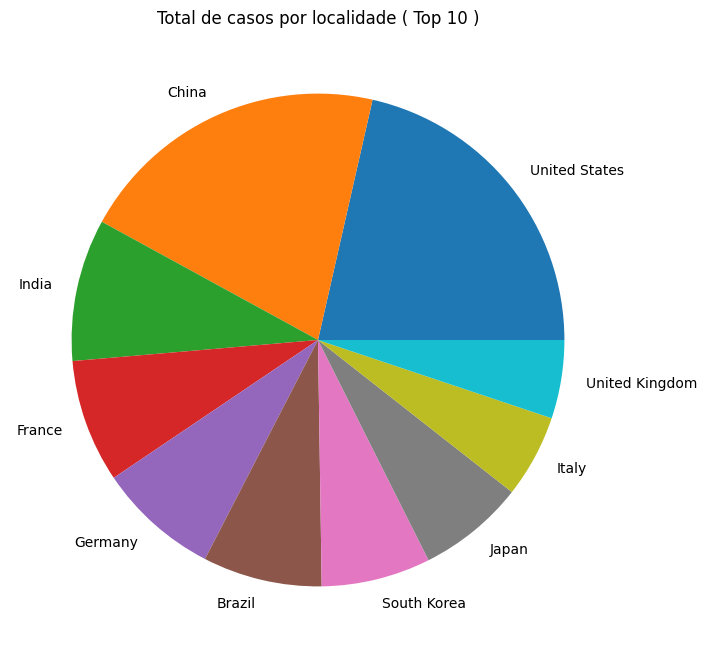

In [63]:
grouped_df = df[df['continent'].str.len() > 0].groupby('location')['total_cases'].max().reset_index().sort_values('total_cases', ascending = False)
top10 = grouped_df[:10].copy()
top_locations = top10['location']

plt.figure(figsize=(8, 8))
plt.pie(top10['total_cases'], labels=top10['location'])
plt.title('Total de casos por localidade ( Top 10 )')
plt.show()


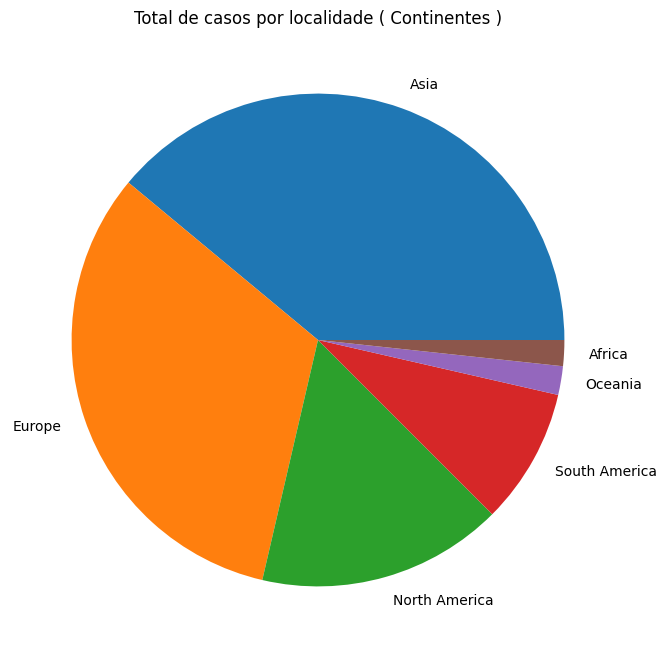

In [64]:
df_continents = df[df['continent'].str.len() > 0].groupby('continent')['new_cases'].sum().reset_index().sort_values('new_cases', ascending = False)
plt.figure(figsize=(8, 8))
plt.pie(df_continents['new_cases'], labels=df_continents['continent'])
plt.title('Total de casos por localidade ( Continentes )')
plt.show()


# Séries Temporáis

No final de dezembro de 2019, as pessoas em Wuhan, na China, começaram a adoecer com uma pneumonia até então desconhecida, marcando o início de uma nova doença infecciosa, mais tarde identificada como um novo tipo de coronavírus e denominada SARS-CoV-2.

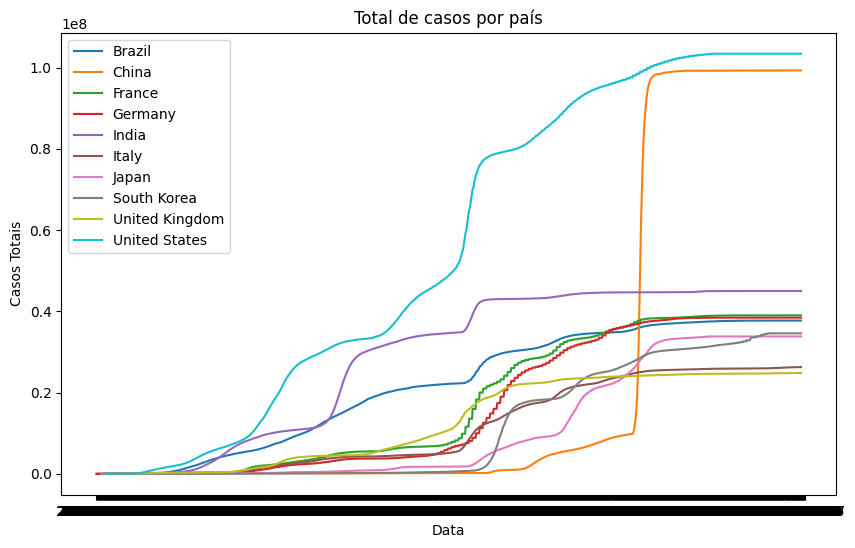

In [66]:
plt.figure(figsize=(10, 6))
df_filtrado = df[df['location'].isin(top_locations)].sort_values('date')
for location, group in df_filtrado.groupby('location'):
    plt.plot(group['date'], group['total_cases'], label=location)

plt.title('Total de casos por país')
plt.xlabel('Data')
plt.ylabel('Casos Totais')
plt.legend()
plt.show()


De dezembro de 2019 a 25 de maio de 2023, ocorreram quase 700 milhões de casos de COVID-19 e quase 7 milhões de mortes em todo o mundo.

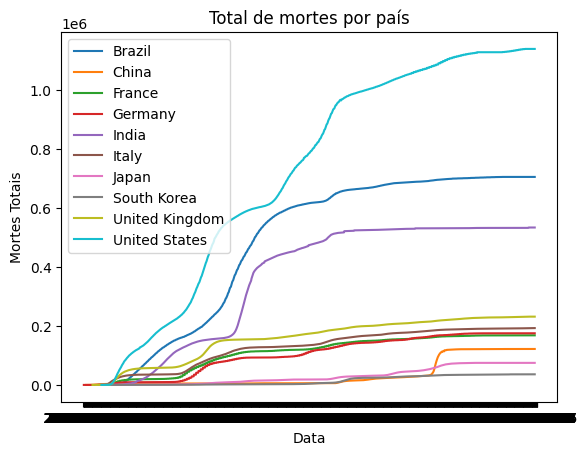

In [67]:
for location, group in df_filtrado.groupby('location'):
    plt.plot(group['date'], group['total_deaths'], label=location)

plt.title('Total de mortes por país')
plt.xlabel('Data')
plt.ylabel('Mortes Totais')
plt.legend()
plt.show()


A criação de vacinas para combater o vírus marcou uma viragem significativa na taxa de mortes e infecções. A primeira vacina foi administrada em 8 de dezembro de 2020. Em 25 de maio de 2023, 70% da população mundial recebeu pelo menos uma dose da vacina COVID-19.